In [69]:
!pip install xgboost -q

In [70]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix,classification_report, precision_score, f1_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [71]:
# import the dataset
df= sns.load_dataset("iris")

In [72]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

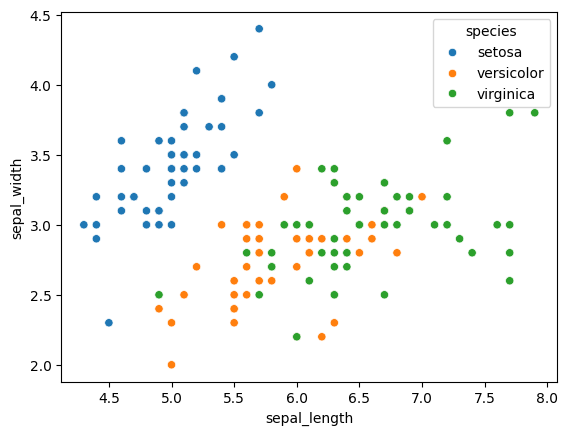

In [73]:
# plot the data as scatter plot
sns.scatterplot(x='sepal_length', y='sepal_width',hue='species', data=df)
# plt.show()
# sns.scatterplot(x='petal_length', y='petal_width', data=df)
# plt.show()

In [74]:
# split the data into train and test
X = df.drop('species', axis=1)
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
# train the decision tree model
# dt = DecisionTreeClassifier()
# dt.fit(X_train, y_train)

# # pridict the data
# y_pred = dt.predict(X_test)


# evaluate the model
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Confusion Matrix")
# print(confusion_matrix(y_test, y_pred))
# print("Classification Report")
# print(classification_report(y_test, y_pred))
# print("Precision Score:", precision_score(y_test, y_pred, average='micro'))
# print("Recall Score:", recall_score(y_test, y_pred, average='micro'))
# print("F1 Score:", f1_score(y_test, y_pred, average='micro'))

In [76]:
# # Encode the target variable
# le = LabelEncoder()
# y = le.fit_transform(y)
# #y = le.transform(y)

In [77]:
# Encode the target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# train the model using xgboost
xgb = XGBClassifier()
xgb.fit(X_train, y_train_encoded)

# predict the data
y_pred_encoded = xgb.predict(X_test)


In [78]:
%%time
# import libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

# split the data into train and test
X = df.drop('species', axis=1)
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train the decision tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# pridict the data
y_pred = dt.predict(X_test)

# evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))
print("Classification Report")
print(classification_report(y_test, y_pred))
print("Precision Score:", precision_score(y_test, y_pred, average='micro'))
print("Recall Score:", recall_score(y_test, y_pred, average='micro'))
print("F1 Score:", f1_score(y_test, y_pred, average='micro'))

Accuracy: 1.0
Confusion Matrix
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Precision Score: 1.0
Recall Score: 1.0
F1 Score: 1.0
CPU times: total: 438 ms
Wall time: 38.1 ms


In [79]:
%%time
# train the random forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# pridict the data
y_pred = rf.predict(X_test)

# evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))
print("Classification Report")

Accuracy: 1.0
Confusion Matrix
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report
CPU times: total: 250 ms
Wall time: 137 ms


In [80]:
%%time
# train the model using xgboost
xgb = XGBClassifier()
xgb.fit(X_train, y_train_encoded)

# predict the data
y_pred_encoded = xgb.predict(X_test)

# evaluate the model
print("Accuracy:", accuracy_score(y_test_encoded, y_pred_encoded))
print("Confusion Matrix")
print(confusion_matrix(y_test_encoded, y_pred_encoded))
print("Classification Report")
print(classification_report(y_test_encoded, y_pred_encoded))
print("Precision Score:", precision_score(y_test_encoded, y_pred_encoded, average='micro'))
print("Recall Score:", recall_score(y_test_encoded, y_pred_encoded, average='micro'))
print("F1 Score:", f1_score(y_test_encoded, y_pred_encoded, average='micro'))


Accuracy: 1.0
Confusion Matrix
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Precision Score: 1.0
Recall Score: 1.0
F1 Score: 1.0
CPU times: total: 1.34 s
Wall time: 150 ms


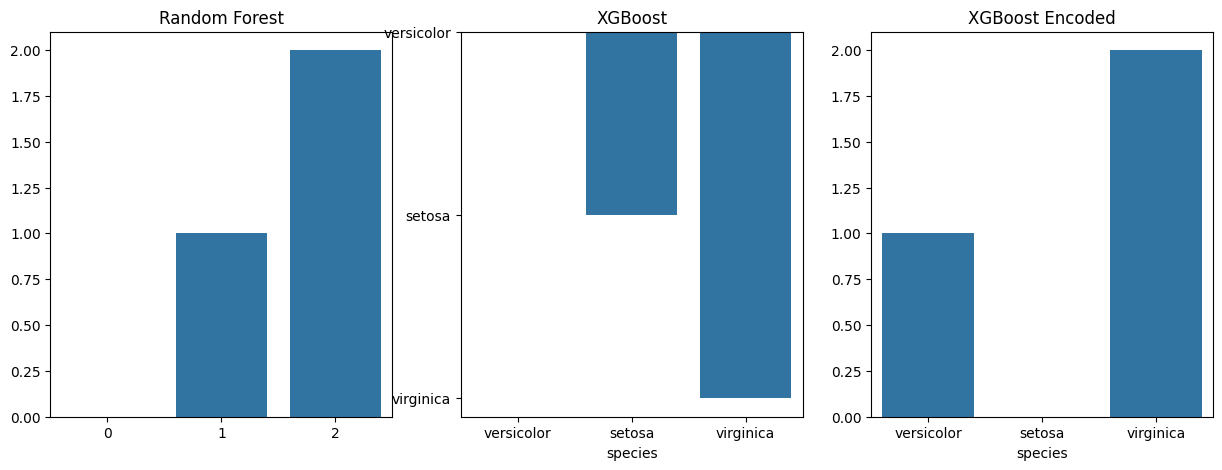

In [81]:
# make a bar plot showing each of the matices with respect to the model
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.barplot(x=y_test_encoded, y=y_pred_encoded, ax=axs[0])
axs[0].set_title("Random Forest")
sns.barplot(x=y_test, y=y_pred, ax=axs[1])
axs[1].set_title("XGBoost")
sns.barplot(x=y_test, y=y_pred_encoded, ax=axs[2])
axs[2].set_title("XGBoost Encoded")
plt.show()

xgboost on dimond dataset

In [82]:
# import the dataset
df= sns.load_dataset("diamonds")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [83]:
df.shape

(53940, 10)

In [85]:
# split the data into X and y
X = df.drop('cut', axis=1)
y = df['cut']







# encode the input variable
le=LabelEncoder()
X['color']=le.fit_transform(X['color'])
X['clarity']=le.fit_transform(X['clarity'])

# encode the target variable
y= le.fit_transform(y)

# split the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [86]:
%%time
# train the model using decision tree model
dt=DecisionTreeClassifier()
dt.fit(X_train, y_train)

# predict the data
y_pred = dt.predict(X_test)

# evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='micro'))
print('Recall:', recall_score(y_test, y_pred, average='micro'))
print('F1:', f1_score(y_test, y_pred, average='micro'))

Accuracy: 0.7131071560993697
Precision: 0.7131071560993697
Recall: 0.7131071560993697
F1: 0.7131071560993697
CPU times: total: 453 ms
Wall time: 477 ms


In [87]:
%%time
# train the model using random forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# predict the data
y_pred = rf.predict(X_test)

#evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='micro'))
print('Recall:', recall_score(y_test, y_pred, average='micro'))
print('F1:', f1_score(y_test, y_pred, average='micro'))



Accuracy: 0.789302929180571
Precision: 0.789302929180571
Recall: 0.789302929180571
F1: 0.789302929180571
CPU times: total: 12.2 s
Wall time: 12.3 s


In [88]:
%%time
# train the model using xgboost
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# predict the data
y_pred = xgb.predict(X_test)


#evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='micro'))
print('Recall:', recall_score(y_test, y_pred, average='micro'))
print('F1:', f1_score(y_test, y_pred, average='micro'))

Accuracy: 0.8056173526140156
Precision: 0.8056173526140156
Recall: 0.8056173526140156
F1: 0.8056173526140155
CPU times: total: 17.2 s
Wall time: 1.23 s
